## Imports:

In [1]:
from arcgis.gis import GIS
from arcgis.gis import *
from IPython.display import display
from arcgis.features import FeatureLayer

## Conexion:

### AGOL

In [85]:
gis = GIS(url="http://www.arcgis.com", username="renemorenow")
#gis = GIS(url="http://www.arcgis.com", username="williamrenem")
#gis = GIS(url="http://www.arcgis.com", username="wmoreno_project_esri_co")

Enter password: ········


In [91]:
gis = GIS(url='https://pythonapi.playground.esri.com/portal', username='arcgis_python', password='amazing_arcgis_123')

### SGC

In [2]:
gis = GIS(profile="sgc20_desarrollo")
from sgc import sgccat20lib
sgccat20lib.gisConnection = gis

In [6]:
gisContentParcelService = gis.content.get("2bb0fcf269ae42249a77fcd65af91ab6")

In [7]:
lyr_terreno = next(iter(filter(lambda x: x.properties.name.upper()=="Terreno".upper(), gisContentParcelService.layers)), None)
lyr_terreno

<FeatureLayer url:"https://multiproposito.catastroamco.gov.co/server/rest/services/SERVICIOS/FS_Conservacion_Consulta/FeatureServer/58">

In [11]:
ui = [f for f in lyr_terreno.properties.indexes if f.isUnique]
ui

[{
   "name": "uuid_105",
   "fields": "globalid",
   "isAscending": true,
   "isUnique": true,
   "description": ""
 },
 {
   "name": "a46_ix1",
   "fields": "shape",
   "isAscending": true,
   "isUnique": true,
   "description": ""
 }]

### ver conexion

In [3]:
print(gis.url, " ==> ", gis.users.me.username)

http://renemorenow.maps.arcgis.com  ==>  renemorenow


## ObtenerParametros SGC:

In [ ]:
id_municipio = "54001"
dictParams = sgccat20lib.ObtenerParametros(id_municipio=id_municipio)
parcel_service = dictParams["PARCEL_SERVICE_NAME"]
ParcelService = gis.content.get(parcel_service)
ParcelService

# Topics
### Symbology/ Visualization
### Access feature attributes
### Recognize and interpret JSON

In [ ]:
path = os.getcwd()
data_path = "data"
data_path = os.path.join(path[:path.find("TemasExamen_ApiforPython")], "TemasExamen_ApiforPython", data_path)
data_path

## https://developers.arcgis.com/python/guide/smart-mapping/

In [9]:
map1 = gis.map('USA',3)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [41]:
search_result = gis.content.search(query='freeway',
                                  item_type = 'Feature Layer' )
search_result

[]

In [12]:
freeway_item = search_result[0]
map1.add_layer(freeway_item)
map1

IndexError: list index out of range

In [8]:
# Use the first layer available on the service.
freeway_feature_layer = freeway_item.layers[0]

# Print the layer's url and field names.
print(freeway_feature_layer.url)
for field in freeway_feature_layer.properties['fields']:
    print(field['name'])

https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Freeway_System/FeatureServer/1
OBJECTID
ROUTE_NUM
CLASS
NUMBER
SUFFIX
DIST_MILES
DIST_KM


In [10]:
map1.add_layer(freeway_feature_layer, {"renderer":"ClassedSizeRenderer", "field_name": "DIST_MILES"})
# Change map's extent to Los Angeles city
map1.center = [34, -118]
map1.zoom = 10
map1

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

In [13]:
map2 = gis.map('Seattle, WA', 6)
map2

MapView(layout=Layout(height='400px', width='100%'))

In [22]:
map2.add_layer({"type":"FeatureLayer", 
               "url":"http://sampleserver6.arcgisonline.com/arcgis/rest/services/Census/MapServer/2",
               "definition_expression" : "STATE_NAME='Washington'",
               "renderer":"ClassedColorRenderer",
               "field_name":"POP2007",
               "opacity":0.7
              })
map2

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

### Mapas de calor:

In [31]:
map3 = gis.map('Los Angeles', 8)
map3.add_layer({"type":"FeatureLayer",
                "url":"http://services1.arcgis.com/hLJbHVT9ZrDIzK0I/arcgis/rest/services/EQMagGt4/FeatureServer/0",
                "renderer":"HeatmapRenderer",
                "opacity":0.75})
map3

MapView(layout=Layout(height='400px', width='100%'))

In [32]:
from arcgis.gis import GIS
from sgc import sgccat20lib
sgccat20lib.profile_storaged = "sgc20_sabanalarga"
gis = sgccat20lib.gisLogin()
print(gis.url)

https://arcgis.catasig.com.co/portal/


In [51]:
map4 = gis.map("Sabanalarga",12)
map4

MapView(layout=Layout(height='400px', width='100%'))

In [38]:
from arcgis.features import *
dictParams = sgccat20lib.ObtenerParametros()
parcel_service = dictParams["PARCEL_SERVICE_NAME"]
gis = sgccat20lib.gisLogin("profile")
ParcelService = gis.content.get(parcel_service)
urlParcelService = ParcelService.url

In [41]:
predio_table = next(iter(filter(lambda x: x.properties.name.upper()=="PREDIO".upper(), ParcelService.tables)), None)
terreno_table = next(iter(filter(lambda x: x.properties.name.upper()=="TERRENO".upper(), ParcelService.layers)), None)

In [40]:
kwargs = { "return_geometry": True, "result_record_count": 3 }
datosPredio = sgccat20lib.get_features_layertable_where(
    gis,
    predio_table.url,
    "condicion_predio='NPH'",
    "*",
    None,
    ["LC_Terreno"],
    ["*"],
    **kwargs)

In [45]:
rel_terreno = next(iter(filter(lambda x: x["name"].upper()=="LC_Terreno".upper(), datosPredio["Relationships"])), None)
#if rel_terreno and len(rel_terreno["features"]) > 0:
featuresTerreno = list(filter(lambda x: x["attributes"].get("retiredbyrecord") is None, rel_terreno["features"]))
globalids = [f["attributes"]["globalid"] for f in featuresTerreno]
GIDs_predio = tuple(globalids) if len(globalids) > 1 else "('{}')".format(globalids[0])
where = "globalid in {0}".format(GIDs_predio)
datosTerreno = terreno_table.query("1=1",return_geometry=True)

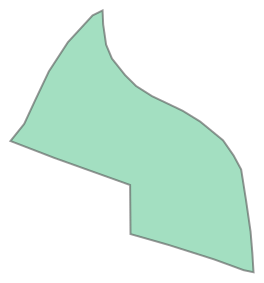

In [44]:
import copy
from arcgis.geometry import Geometry, Polygon
fts_terreno = copy.deepcopy(datosTerreno)
feat_collect = FeatureCollection.from_featureset(fts_terreno)

# create = analysis.aggregate_points()
polygon = Geometry(fts_terreno.features[0].geometry)
polygon

In [77]:
for field in terreno_table.properties["fields"]:
    print(field['name'])

objectid
globalid
name
createdbyrecord
retiredbyrecord
statedarea
statedareaunit
calculatedarea
miscloseratio
misclosedistance
isseed
created_user
created_date
last_edited_user
last_edited_date
Shape__Area
Shape__Length
area_terreno
avaluo_terreno
dimension
etiqueta
relacion_superficie
manzana_vereda_codigo
validationstatus


In [83]:
map4.add_layer(terreno_table,{"renderer":"SimpleRenderer","field":"manzana_vereda_codigo"})
map4

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

## https://developers.arcgis.com/python/guide/advanced-cartography-part1/

In [47]:
map1 = gis.map("USA", 4)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [44]:
from arcgis.features import FeatureLayer
usa_flayer = FeatureLayer("https://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/USA_County_Crops_2007/FeatureServer/0")
print(type(usa_flayer))
map1.add_layer(usa_flayer, { "type": "FeatureLayer",
                             "renderer":"ClassedColorRenderer",
                             "field_name":"M086_07"})

<class 'arcgis.features.layer.FeatureLayer'>


In [45]:
feature_set = usa_flayer.query("FID<=100")
feature_set.sdf.head()

,FID,AREA,PERIMETER,AGCENSP020,STATE,COUNTY,FIPS,ST,M003_07,M009_07,...,M099_07,M090_07,M172_07,M188_07,M193_07,M217_07,M233_07,M234_07,TotalFarmedAcres,SHAPE
0,1,0.00003,0.02149,502.0,AK,Juneau Area,02110,02,14.0,29.73,...,216319.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"{""rings"": [[[-15176096.5064839, 7921583.613428..."
1,2,0.00017,0.06661,503.0,AK,Aleutian Islands Area,02010,02,19817.0,68.57,...,110557.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10,"{""rings"": [[[-16966971.5634053, 7919854.606389..."
2,3,0.00003,0.02353,504.0,AK,Aleutian Islands Area,02010,02,19817.0,68.57,...,110557.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10,"{""rings"": [[[-17284074.9856888, 7918871.408648..."
3,4,0.00021,0.06889,505.0,AK,Juneau Area,02110,02,14.0,29.73,...,216319.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"{""rings"": [[[-14874869.8715385, 7915589.101788..."
4,5,0.00135,0.17978,506.0,AK,Juneau Area,02110,02,14.0,29.73,...,216319.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"{""rings"": [[[-15170248.0871, 7910023.20022296]..."


In [48]:
map2 = gis.map("USA", 4)
map2_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"M086_07",
                 "minValue":-9007199254740991}
map2_renderer["visualVariables"] = [{   "type": "colorInfo",
                                        "field": "M086_07",
                                        "stops": [  {
                                                        "value": 10,
                                                        "color": [237,248,251,204],
                                                        "label": "< 10"
                                                    },
                                                    {
                                                        "value": 25,
                                                        "color": [178,226,226,204],
                                                        "label": "10~39.5"
                                                    },
                                                    {
                                                        "value": 39.5,
                                                        "color": [102,194,164,204],
                                                        "label": "39.5"
                                                    },
                                                    {
                                                        "value": 54,
                                                        "color": [44,162,95,204],
                                                        "label": "39.5~68"
                                                    },
                                                    {
                                                        "value": 68,
                                                        "color": [0,109,44,204],
                                                        "label": "> 68"
                                                    }]
                                    }]

map2_renderer["classBreakInfos"] = [{   "symbol": {
                                            "color": [170,170,170,204],
                                            "outline": {
                                                "color": [153,153,153,255],
                                                "width": 0.375,
                                                "type": "esriSLS",
                                                "style": "esriSLSSolid"
                                            },
                                            "type": "esriSFS",
                                            "style": "esriSFSSolid"
                                        },
                                        "classMaxValue": 9007199254740991
                                    }]

map2.add_layer(usa_flayer,
               { "type": "FeatureLayer",
                 "renderer": map2_renderer,
                 "field_name":"M086_07",
                 "minValue":-9007199254740991,
                 "definitionExpression": "AREA > 0.001"})

map2

MapView(layout=Layout(height='400px', width='100%'))

In [102]:
map3 = gis.map("USA", 4)

map3_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"M188_07",
                 "transparency":20,
                 "minValue":-9007199254740991}

map3_renderer["visualVariables"] = [{   "type": "sizeInfo",
                                        "field": "M188_07",
                                        "valueUnit": "unknown",
                                        "minSize": {
                                            "type": "sizeInfo",
                                            "expression": "view.scale",
                                            "stops": [{     "value": 1128,
                                                            "size": 16
                                                        },
                                                        {   "value": 144447,
                                                            "size": 16
                                                        },
                                                        {   "value": 18489298,
                                                            "size": 4
                                                        },
                                                        {   "value": 147914382,
                                                            "size": 4
                                                        },
                                                        {   "value": 591657528,
                                                            "size": 2
                                                        }]
                                        },
                                        "maxSize": {
                                            "type": "sizeInfo",
                                            "expression": "view.scale",
                                            "stops": [{     "value": 1128,
                                                            "size": 80
                                                        },
                                                        {   "value": 144447,
                                                            "size": 80
                                                        },
                                                        {   "value": 18489298,
                                                            "size": 50
                                                        },
                                                        {   "value": 147914382,
                                                            "size": 50
                                                        },
                                                        {   "value": 591657528,
                                                            "size": 25
                                                        }]
                                        },
                                        "minDataValue": 0,
                                        "maxDataValue": 150000
                                    },
                                    {   "type": "sizeInfo",
                                        "target": "outline",
                                        "expression": "view.scale",
                                        "stops": [{     "size": 2,
                                                        "value": 1080478
                                                    },
                                                    {   "size": 1,
                                                        "value": 6752990
                                                    },
                                                    {   "size": 1,
                                                        "value": 27011958
                                                    },
                                                    {   "size": 0,
                                                        "value": 54023916
                                                    }]
                                    }]

map3_renderer["classBreakInfos"] =     [{   "symbol": {
                                                "color": [227,139,79,255],
                                                "size": 9,
                                                "angle": 0,
                                                "xoffset": 0,
                                                "yoffset": 0,
                                                "type": "esriSMS",
                                                "style": "esriSMSCircle",
                                                "outline": {
                                                    "color": [51,51,51,255],
                                                    "width": 0.75,
                                                    "type": "esriSLS",
                                                    "style": "esriSLSSolid"
                                                }
                                            },
                                            "classMaxValue": 9007199254740991
                                        }]

map3.add_layer(usa_flayer,
               { "type": "FeatureLayer",
                 "renderer":map3_renderer,
                 "field_name":"M188_07"})

map3

MapView(layout=Layout(height='400px', width='100%'))

In [104]:
map4 = gis.map("France", 2)

map4_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"POP2025",
                 "transparency":80,
                 "minValue":-9007199254740991}

map4_renderer["visualVariables"] = [{   "type": "colorInfo",
                                        "field": "POP2025",
                                        "normalizationField": "POP2015",
                                        "stops": [
                                            {   "value": 1.12,
                                                "color": [230,97,1,255],
                                                "label": "< 112%"
                                            },
                                            {   "value": 1.1800000000000002,
                                                "color": [253,184,99,255],
                                                "label": "112% ~ 124%"
                                            },
                                            {   "value": 1.24,
                                                "color": [247,247,247,255],
                                                "label": "124%"
                                            },
                                            {   "value": 1.3,
                                                "color": [178,171,210,255],
                                                "label": "124% ~ 136%"
                                            },
                                            {   "value": 1.36,
                                                "color": [94,60,153,255],
                                                "label": "> 136%"
                                            }]
                                    }]

map4_renderer["classBreakInfos"] = [{   "symbol": {
                                            "color": [170,170,170,255],
                                            "size": 10.5,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": [153,153,153,255],
                                                "width": 0.375,
                                                "type": "esriSLS",
                                                "style": "esriSLSSolid"
                                            }
                                        },
                                        "classMaxValue": 9007199254740991
                                    }]

world_flayer = FeatureLayer("http://services.arcgis.com/nGt4QxSblgDfeJn9/arcgis/rest/services/World_LargestUrbanAreas_fs/FeatureServer/0")

map4.add_layer(world_flayer,
               { "type": "FeatureLayer",
                 "renderer": map4_renderer,
                 "field_name":"POP2025",
                 "normalizationType": "esriNormalizeByField",
                 "normalizationField": "POP2015"})

map4

MapView(layout=Layout(height='400px', width='100%'))

In [105]:
map5 = gis.map("USA", 4)

map5_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "uniqueValue"}

map5_renderer["valueExpression"] = "var fieldNames = [ \"M163_07\", \"M172_07\", \"M193_07\", \"M188_07\", \"M217_07\" ];\
                                    var numFields = 5;\
                                    var maxValueField = null;\
                                    var maxValue = -Infinity;\
                                    var value, i, totalValue = null;\
                                    for(i = 0; i < numFields; i++) {\
                                        value = $feature[fieldNames[i]];\
                                        if(value > 0) {\
                                            if(value > maxValue) {\
                                                maxValue = value;\
                                                maxValueField = fieldNames[i];\
                                            }\
                                            else if (value == maxValue) {\
                                                maxValueField = null;\
                                            }\
                                        }\
                                    }\
                                    return maxValueField;"

transparencyInfo_valueExpression = "var fieldNames = [ \"M163_07\", \"M172_07\", \"M193_07\", \"M188_07\", \"M217_07\" ];\
                                    var numFields = 5;\
                                    var maxValueField = null;\
                                    var maxValue = -Infinity;\
                                    var value, i, totalValue = null;\
                                    for(i = 0; i < numFields; i++) {\
                                        value = $feature[fieldNames[i]];\
                                        if(value > 0) {\
                                            if(value > maxValue) {\
                                                maxValue = value;\
                                                maxValueField = fieldNames[i];\
                                            }\
                                            else if (value == maxValue) {\
                                                maxValueField = null;\
                                            }\
                                        }\
                                        if(value != null && value >= 0) {\
                                            if (totalValue == null) { totalValue = 0; }\
                                            totalValue = totalValue + value;\
                                        }\
                                    }\
                                    var strength = null;\
                                    if (maxValueField != null && totalValue > 0) {\
                                        strength = (maxValue / totalValue) * 100;\
                                    }\
                                    return strength;"

sizeInfo_valueExpression = "var fieldNames = [ \"M163_07\", \"M172_07\", \"M193_07\", \"M188_07\", \"M217_07\" ];\
                            var numFields = 5;\
                            var value, i, totalValue = null;\
                            for(i = 0; i < numFields; i++) {\
                                value = $feature[fieldNames[i]];\
                                if(value != null && value >= 0) {\
                                    if (totalValue == null) { totalValue = 0; }\
                                    totalValue = totalValue + value;\
                                }\
                            }\
                            return totalValue;"

map5_renderer["visualVariables"] = [{   "type": "transparencyInfo",
                                        "valueExpression": transparencyInfo_valueExpression,
                                        "stops": [{ "value": 20,
                                                    "transparency": 85
                                                  },
                                                  { "value": 95,
                                                    "transparency": 0
                                                  }],
                                        "legendOptions": {"title": "Strength of predominance"}
                                    },
                                    {   "type": "sizeInfo",
                                        "valueExpression": sizeInfo_valueExpression,
                                        "valueUnit": "unknown",
                                        "minSize": {
                                            "type": "sizeInfo",
                                            "expression": "view.scale",
                                            "stops": [{ "value": 1128,
                                                        "size": 16
                                                      },
                                                      { "value": 72223,
                                                        "size": 16
                                                      },
                                                      { "value": 9244649,
                                                        "size": 6
                                                      },
                                                      { "value": 147914382,
                                                        "size": 4
                                                      },
                                                      { "value": 591657528,
                                                        "size": 2
                                                      }]
                                        },
                                        "maxSize": {
                                            "type": "sizeInfo",
                                            "expression": "view.scale",
                                            "stops": [{ "value": 1128,
                                                        "size": 80
                                                      },
                                                      { "value": 72223,
                                                        "size": 80
                                                      },
                                                      { "value": 9244649,
                                                        "size": 50
                                                      },
                                                      { "value": 147914382,
                                                        "size": 50
                                                      },
                                                      { "value": 591657528,
                                                        "size": 25
                                                      }]
                                        },
                                        "minDataValue": 50000,
                                        "maxDataValue": 800000,
                                        "legendOptions": { "title": "Sum of categories"}
                                    }]

map5_renderer["uniqueValueInfos"] = [{  "value": "M163_07",
                                        "symbol": {
                                            "color": [255,255,0,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": "White",
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSNull"
                                            }
                                        },
                                        "label": "Corn for grain, harvested acres."
                                    },
                                    {   "value": "M172_07",
                                        "symbol": {
                                            "color": [255,170,0,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": "White",
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSNull"
                                            }
                                        },
                                        "label": "All wheat for grain, harvested acres."
                                    },
                                    {   "value": "M193_07",
                                        "symbol": {
                                            "color": [152,230,0,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": "White",
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSNull"
                                            }
                                        },
                                        "label": "Soybeans for beans, harvested acres."
                                    },
                                    {   "value": "M188_07",
                                        "symbol": {
                                            "color": [255,255,255,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": "White",
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSNull"
                                            }
                                        },
                                        "label": "Upland cotton, harvested acres."
                                    },
                                    {   "value": "M217_07",
                                        "symbol": {
                                            "color": [255,0,0,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": "White",
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSNull"
                                            }
                                        },
                                        "label": "Vegetables, acres harvested for sale."
                                    }]


map5.add_layer(usa_flayer,
               { "type": "FeatureLayer",
                 "renderer": map5_renderer})

map5

MapView(layout=Layout(height='400px', width='100%'))

In [108]:
map6 = gis.map("D. C., USA", 11)

map_url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Transportation_WebMercator/MapServer/"
map6_flayer = FeatureLayer(map_url+str(58))    
map6.add_layer(map6_flayer)    

map6_flayer = FeatureLayer(map_url+str(51))    
map6.add_layer(map6_flayer)    

map6

MapView(layout=Layout(height='400px', width='100%'))

In [112]:
map6_flayer_query = map6_flayer.query("1=1")
print(len(map6_flayer_query.features))
map6_flayer_query.sdf.head()

91


,NAME,WEB_URL,ADDRESS,LINE,TRAININFO_URL,SE_ANNO_CAD_DATA,GLOBALID,GIS_ID,OBJECTID,CREATOR,CREATED,EDITOR,EDITED,SHAPE
0,Shady Grove,https://www.wmata.com/rider-guide/stations/sha...,"15903 SOMERVILLE DRIVE, DERWOOD, MD",red,https://www.wmata.com/js/nexttrain/nexttrain.h...,None,{4A7BBA5F-D492-4A0F-A81C-50152E80FADF},MetroStnFullPt_1,1,None,NaT,None,NaT,"{""x"": -8589927.282891212, ""y"": 4738865.8433874..."
1,Rockville,https://www.wmata.com/rider-guide/stations/roc...,"251 HUNGERFORD DRIVE, ROCKVILLE, MD",red,https://www.wmata.com/js/nexttrain/nexttrain.h...,None,{CC804700-B42E-4F50-BC43-EFEB771B7F92},MetroStnFullPt_2,2,None,NaT,None,NaT,"{""x"": -8587867.649331242, ""y"": 4733758.2479591..."
2,Twinbrook,https://www.wmata.com/rider-guide/stations/twi...,"1600 CHAPMAN AVENUE, ROCKVILLE, MD",red,https://www.wmata.com/js/nexttrain/nexttrain.h...,None,{BEBD5C27-B4A4-4085-B5DD-404E32B2D283},MetroStnFullPt_3,3,None,NaT,None,NaT,"{""x"": -8585050.442811435, ""y"": 4730624.6022652..."
3,Glenmont,https://www.wmata.com/rider-guide/stations/gle...,"12501 GEORGIA AVENUE, SILVER SPRING, MD",red,https://www.wmata.com/js/nexttrain/nexttrain.h...,None,{511DB3B0-0EAD-4EF9-A949-84EF64F3DE97},MetroStnFullPt_4,4,None,NaT,None,NaT,"{""x"": -8577563.025576085, ""y"": 4730526.5556229..."
4,White Flint,https://www.wmata.com/rider-guide/stations/whi...,"5500 MARINELLI ROAD, ROCKVILLE, MD",red,https://www.wmata.com/js/nexttrain/nexttrain.h...,None,{14C07EA2-75C0-4AB0-B6F7-CB297C34D4EE},MetroStnFullPt_5,5,None,NaT,None,NaT,"{""x"": -8584161.21202061, ""y"": 4728572.31007085..."


In [52]:
map7 = gis.map("New York City, USA", 11)

map7_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "simple"}

map7_renderer["symbol"] = {     "color": "None",
                                "outline": {
                                    "color": "None",
                                    "width": 0.75,
                                    "type": "esriSLS",
                                    "style": "esriSLSNull"
                                },
                                "type": "esriSFS",
                                "style": "esriSFSSolid"
                            }

map7_f1_layer = FeatureLayer("http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/Census_Counties_20m/FeatureServer/0")
map7.add_layer(map7_f1_layer,
               { "type": "FeatureLayer",
                 "renderer": map7_renderer
                })

map7_f2_layer = FeatureLayer("http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/NY Educational Attainment/FeatureServer/0")
map7.add_layer(map7_f2_layer,
               { "type": "FeatureLayer",
                 "transparency": 75
                })

map7

MapView(layout=Layout(height='400px', width='100%'))

## https://developers.arcgis.com/python/guide/advanced-cartography-part2/

In [7]:
"""
    # with category
    # Unique symbols
    # .../MapServer/58 points to the Map Service REST endpoint of different rail lines in the D. C.
    # .../MapServer/51 points to the Map Service REST endpoint of the metro stops
"""
print(gis)
map6 = gis.map("D. C., USA", 11)

map_url = "http://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Transportation_WebMercator/MapServer/"
map6_flayer = FeatureLayer(map_url+str(61))    
map6.add_layer(map6_flayer)    

map6_flayer = FeatureLayer(map_url+str(47))    
map6.add_layer(map6_flayer)
map6.zoom_to_layer(map6_flayer)
map6

GIS @ http://renemorenow.maps.arcgis.com version:2023.3


MapView(layout=Layout(height='400px', width='100%'))

In [8]:
"""
    # with category and 1 numeric attribute
    # types and sizes
    # The field used here represent a count attribute such as the number of people who have a graduate degree, and use a unique color for each value found in another field such as a county name.
"""
map7 = gis.map("New York City, USA", 11)

map7_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "simple"}

map7_renderer["symbol"] = {     "color": "None",
                                "outline": {
                                    "color": "None",
                                    "width": 0.75,
                                    "type": "esriSLS",
                                    "style": "esriSLSNull"
                                },
                                "type": "esriSFS",
                                "style": "esriSFSSolid"
                            }

map7_f1_layer = FeatureLayer("http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/Census_Counties_20m/FeatureServer/0")
map7.add_layer(map7_f1_layer,
               { "type": "FeatureLayer",
                 "renderer": map7_renderer
                })

map7_f2_layer = FeatureLayer("http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/NY Educational Attainment/FeatureServer/0")
map7.add_layer(map7_f2_layer,
               { "type": "FeatureLayer",
                 "transparency": 75
                })

map7

MapView(layout=Layout(height='400px', width='100%'))

In [10]:
"""
    # 1 date/time attribute
    # (a) Age (Color)
    # The field used here represent which homes in a neighborhood were sold more than 15 years ago and which were sold more recently
"""
mapA = gis.map("Boulder, CO, USA", 10)

mapA_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "minValue":-9007199254740991}

mapA_valueExpression = "var startTime = $feature.SALEDATE;\
                        var endTime = 1464917820000;\
                        var retVal = null;\
                        if (startTime != null && endTime != null) {\
                            startTime = Date(startTime);\
                            endTime = Date(endTime);\
                            retVal = DateDiff(endTime, startTime, 'years');\
                        }\
                        return retVal;"

mapA_renderer["valueExpression"] = mapA_valueExpression

mapA_renderer["visualVariables"] = [    {   "type": "colorInfo",
                                            "valueExpression": mapA_valueExpression,
                                            "stops": [  {   "value": 1,
                                                            "color": [255,196,174,255],
                                                            "label": "< 1"
                                                        },
                                                        {   "value": 4.5,
                                                            "color": [249,129,108,255],
                                                            "label": "1 <= value < 4.5"
                                                        },  
                                                        {   "value": 8,
                                                            "color": [236,82,68,255],
                                                            "label": "4.5 <= value < 11.5"
                                                        },
                                                        {   "value": 11.5,
                                                            "color": [194,61,51,255],
                                                            "label": "11.5 <= value < 15"
                                                        },
                                                        {   "value": 15,
                                                            "color": [123,66,56,255],
                                                            "label": "> 15"
                                                        }],
                                            "legendOptions": {
                                                "title": "Age, in years, from Sale Date to 6/2/2016"
                                            }
                                        },
                                        {
                                            "type": "sizeInfo",
                                            "target": "outline",
                                            "expression": "view.scale",
                                            "stops": [  {   "size": 1.5,
                                                            "value": 713
                                                        },
                                                        {   "size": 0.75,
                                                            "value": 2228
                                                        },
                                                        {   "size": 0.375,
                                                            "value": 8911
                                                        },
                                                        {   "size": 0,
                                                            "value": 17822
                                                        }]
                                        }]

mapA_renderer["classBreakInfos"] = [    {   "symbol": {
                                                "color": [170,170,170,255],
                                                "outline": {
                                                    "color": [128,128,128,128],
                                                    "width": 0.75,
                                                    "type": "esriSLS",
                                                    "style": "esriSLSSolid"
                                                },
                                                "type": "esriSFS",
                                                "style": "esriSFSSolid"
                                            },
                                            "classMaxValue": 9007199254740991
                                        }]

mapA_flayer = FeatureLayer("https://services1.arcgis.com/vXSRPZbyyOmH9pek/arcgis/rest/services/Parcels/FeatureServer/0")

mapA.add_layer(mapA_flayer,
               { "type": "FeatureLayer",
                 "renderer": mapA_renderer})

mapA

MapView(layout=Layout(height='400px', width='100%'))

In [14]:
"""
    # 1 date/time attribute and and 1 numeric attribute
    # (b) Color (Age) and Size
    # The field used here represent when migrants went missing based on the date the incident was reported, and use proportional symbols to show how many migrants were found dead
"""
mapB = gis.map("Mediterranean Sea", 6)
mapB.basemap = mapB.basemaps[0]

mapB_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",
                 "field": "DEAD",  
                 "minValue":-9007199254740991}

mapB_valueExpression = "var startTime = $feature.DATEREPORTED;\
                        var endTime = 1466053210029;\
                        var retVal = null;\
                        if (startTime != null && endTime != null) {\
                            startTime = Date(startTime);\
                            endTime = Date(endTime);\
                            retVal = DateDiff(endTime, startTime, 'months');\
                        }\
                        return retVal;"

mapB_renderer["visualVariables"] = [    {   "type": "colorInfo",
                                            "valueExpression": mapB_valueExpression,
                                            "stops": [  {   "value": 6,
                                                            "color": [188,230,249,255],
                                                            "label": "< 6"
                                                        },
                                                        {   "value": 10.5,
                                                            "color": [116,187,237,255],
                                                            "label": "6 ~ 10.5"
                                                        },
                                                        {   "value": 15,
                                                            "color": [77,150,206,255],
                                                            "label": "10.5 ~ 19.5"
                                                        },
                                                        {   "value": 19.5,
                                                            "color": [72,121,157,255],
                                                            "label": "19.5 ~ 24"
                                                        },
                                                        {   "value": 24,
                                                            "color": [64,77,84,255],
                                                            "label": "> 24"
                                                        }],
                                            "legendOptions": {"title": "Age, in months, from DATEREPORTED to 6/15/2016"}
                                        },
                                        {   "type": "transparencyInfo",
                                            "field": "DATEREPORTED",
                                            "stops": [  {   "value": 1388563200000,
                                                            "transparency": 70
                                                        },
                                                        {   "value": 1451635200000,
                                                            "transparency": 0
                                                        }]
                                        },
                                        {   "type": "sizeInfo",
                                            "field": "DEAD",
                                            "valueUnit": "unknown",
                                            "minSize": 3,
                                            "maxSize": 33.75,
                                            "minDataValue": 0,
                                            "maxDataValue": 200
                                        }]

mapB_renderer["classBreakInfos"] = [    {   "symbol": {
                                                "color": [227,139,79,255],
                                                "size": 9,
                                                "angle": 0,
                                                "xoffset": 0,
                                                "yoffset": 0,
                                                "type": "esriSMS",
                                                "style": "esriSMSCircle",
                                                "outline": {
                                                    "color": "White",
                                                    "width": 0.75,
                                                    "type": "esriSLS",
                                                    "style": "esriSLSNull"
                                                }
                                            },
                                            "classMaxValue": 9007199254740991
                                        }]

mapB_flayer = FeatureLayer("https://services1.arcgis.com/4yjifSiIG17X0gW4/arcgis/rest/services/Missing Migrants - Incident Reports/FeatureServer/0")

mapB.add_layer(mapB_flayer,
               { "type": "FeatureLayer",
                 "renderer": mapB_renderer})

mapB.zoom_to_layer(mapB_flayer)
mapB

MapView(layout=Layout(height='400px', width='100%'))

In [13]:
"""
    # 1 date/time attribute and 1 category/type attribute
    # (c) Types and Size (Age)
    # The field used here represent if using Visa or American express for payment method
"""
mapC = gis.map("Beverley Hills, CA, USA", 12)

mapC_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "uniqueValue",  
                 "field1":"PAYMENT",
                 "transparency":20,
                 "minValue":-9007199254740991}

mapC_valueExpression = "var startTime = $feature.Date;\
                        var endTime = 1466106730360;\
                        var retVal = null;\
                        if (startTime != null && endTime != null) {\
                          startTime = Date(startTime);\
                          endTime = Date(endTime);\
                          retVal = DateDiff(endTime, startTime, 'years');\
                        }\
                        return retVal;"

mapC_renderer["visualVariables"] = [{   "type": "transparencyInfo",
                                        "field": "Date",
                                        "stops": [
                                            {   "value": 1383597165692,
                                                "transparency": 9.999999999999998
                                            },
                                            {   "value": 1383917219586,
                                                "transparency": 85
                                            }]
                                    },
                                    {   "type": "sizeInfo",
                                        "valueExpression": mapC_valueExpression,
                                        "valueUnit": "unknown",
                                        "legendOptions": {"title": "Age, in years, from Date to 6/16/2016"},
                                        "minSize": 6,
                                        "maxSize": 30,
                                        "minDataValue": 2.605007927448,
                                        "maxDataValue": 2.62144628361238
                                    }]

mapC_renderer["uniqueValueInfos"] = [{  "value": "VI",
                                        "symbol": {
                                            "color": [0,77,168,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": [190,210,255,88],
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSSolid"
                                            }
                                        },
                                        "label": "Visa"
                                    },
                                    {   "value": "AX",
                                        "symbol": {
                                            "color": [56,168,0,255],
                                            "size": 6,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": [163,255,115,82],
                                                "width": 0.75,
                                                "type": "esriSLS",
                                                "style": "esriSLSSolid"
                                            }
                                        },
                                        "label": "Amex"
                                    }]

mapC_flayer = FeatureLayer("http://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/Visa versus Amex/FeatureServer/0")

mapC.add_layer(mapC_flayer,
               { "type": "FeatureLayer",
                 "renderer": mapC_renderer,
                 "field_name":"PAYMENT"})
mapC.zoom_to_layer(mapC_flayer)
mapC

MapView(layout=Layout(height='400px', width='100%'))

## https://developers.arcgis.com/python/guide/working-with-feature-layers-and-features/

In [21]:
from arcgis.features import FeatureLayerCollection

<Item title:"ConterminousUSA" type:Feature Layer Collection owner:renemorenow>
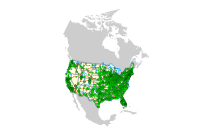

In [15]:
# Search for 'USA major cities' feature layer collection
search_results = gis.content.search('title: USA Major Cities',
                                    'Feature Layer')

# Access the first Item that's returned
major_cities_item = search_results[0]

major_cities_item

In [16]:
major_cities_layers = major_cities_item.layers
major_cities_layers

[<FeatureLayer url:"https://services3.arcgis.com/Bd3GqULNdzgCeQfi/arcgis/rest/services/ConterminousUSA/FeatureServer/0">,
 <FeatureLayer url:"https://services3.arcgis.com/Bd3GqULNdzgCeQfi/arcgis/rest/services/ConterminousUSA/FeatureServer/1">,
 <FeatureLayer url:"https://services3.arcgis.com/Bd3GqULNdzgCeQfi/arcgis/rest/services/ConterminousUSA/FeatureServer/2">,
 <FeatureLayer url:"https://services3.arcgis.com/Bd3GqULNdzgCeQfi/arcgis/rest/services/ConterminousUSA/FeatureServer/3">,
 <FeatureLayer url:"https://services3.arcgis.com/Bd3GqULNdzgCeQfi/arcgis/rest/services/ConterminousUSA/FeatureServer/4">,
 <FeatureLayer url:"https://services3.arcgis.com/Bd3GqULNdzgCeQfi/arcgis/rest/services/ConterminousUSA/FeatureServer/5">,
 <FeatureLayer url:"https://services3.arcgis.com/Bd3GqULNdzgCeQfi/arcgis/rest/services/ConterminousUSA/FeatureServer/6">,
 <FeatureLayer url:"https://services3.arcgis.com/Bd3GqULNdzgCeQfi/arcgis/rest/services/ConterminousUSA/FeatureServer/7">]

<Item title:"USA Freeway System" type:Feature Layer Collection owner:esri_dm>
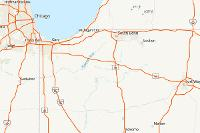

In [17]:
freeways = gis.content.get('91c6a5f6410b4991ab0db1d7c26daacb')
freeways

In [18]:
freeways.layers 

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Freeway_System/FeatureServer/1">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Freeway_System/FeatureServer/2">]

In [19]:
for lyr in freeways.layers:
    print(lyr.properties.name)

USA Freeway System (over 1:500k)
USA Freeway System (below 1:500k)


In [24]:
fs_url = 'https://services2.arcgis.com/ZQgQTuoyBrtmoGdP/arcgis/rest/services/SF_311_Incidents/FeatureServer'
sanfran = FeatureLayerCollection(fs_url)
sanfran

<FeatureLayerCollection url:"https://services2.arcgis.com/ZQgQTuoyBrtmoGdP/arcgis/rest/services/SF_311_Incidents/FeatureServer">

In [23]:
sanfran.layers

[<FeatureLayer url:"https://services2.arcgis.com/ZQgQTuoyBrtmoGdP/arcgis/rest/services/SF_311_Incidents/FeatureServer/0">]

In [25]:
sanfran.tables

[<Table url:"https://services2.arcgis.com/ZQgQTuoyBrtmoGdP/arcgis/rest/services/SF_311_Incidents/FeatureServer/1">]

In [27]:
feature_layer = major_cities_item.layers[0]
feature_layer

<FeatureLayer url:"https://services3.arcgis.com/Bd3GqULNdzgCeQfi/arcgis/rest/services/ConterminousUSA/FeatureServer/0">

In [28]:
feature_layer.properties.capabilities

'Create,Delete,Query,Update,Editing,Sync'

In [29]:
feature_layer.properties.drawingInfo.renderer.type

'simple'

In [33]:
feature_layer.url

'https://services3.arcgis.com/Bd3GqULNdzgCeQfi/arcgis/rest/services/ConterminousUSA/FeatureServer/0'

In [35]:
query_result1 = feature_layer.query(where='1=1', 
                                    out_fields='*')
len(query_result1.features)

48

In [36]:
query_result1.features[0].geometry

{'x': -1900084.5836696355,
 'y': 1103178.0265023652,
 'spatialReference': {'wkid': 102008, 'latestWkid': 102008}}

In [37]:
query_result1.fields

[{'name': 'OBJECTID',
  'type': 'esriFieldTypeOID',
  'alias': 'OBJECTID',
  'sqlType': 'sqlTypeOther',
  'domain': None,
  'defaultValue': None},
 {'name': 'CITY_FIPS',
  'type': 'esriFieldTypeString',
  'alias': 'CITY_FIPS',
  'sqlType': 'sqlTypeOther',
  'length': 5,
  'domain': None,
  'defaultValue': None},
 {'name': 'CITY_NAME',
  'type': 'esriFieldTypeString',
  'alias': 'CITY_NAME',
  'sqlType': 'sqlTypeOther',
  'length': 40,
  'domain': None,
  'defaultValue': None},
 {'name': 'STATE_FIPS',
  'type': 'esriFieldTypeString',
  'alias': 'STATE_FIPS',
  'sqlType': 'sqlTypeOther',
  'length': 2,
  'domain': None,
  'defaultValue': None},
 {'name': 'STATE_NAME',
  'type': 'esriFieldTypeString',
  'alias': 'STATE_NAME',
  'sqlType': 'sqlTypeOther',
  'length': 25,
  'domain': None,
  'defaultValue': None},
 {'name': 'STATE_CITY',
  'type': 'esriFieldTypeString',
  'alias': 'STATE_CITY',
  'sqlType': 'sqlTypeOther',
  'length': 7,
  'domain': None,
  'defaultValue': None},
 {'name': 

## https://community.esri.com/t5/arcgis-api-for-python-blog/methods-for-updating-layer-symbology-with-the/ba-p/902923

In [43]:
from arcgis import GIS
from arcgis.features import FeatureLayerCollection
import json, sys

In [40]:
def search_item(conn,layer_name):
    search_results = conn.content.search(layer_name, item_type='Web Map')
    proper_index = [i for i, s in enumerate(search_results) if 
                    '"'+layer_name+'"' in str(s)]
    found_item = search_results[proper_index[0]]
    get_item = conn.content.get(found_item.id)
    return get_item


def update_wm_layerdef(item):
    item_data = item.get_data()

    print("*******************ORIGINAL DEFINITION*********************")
    print(json.dumps(item_data, indent=4, sort_keys=True))
    # Open JSON file containing symbology update
    with open('/path/to/webmaplyr.json') as json_data:
        data = json.load(json_data)

    # Set the item_properties to include the desired update
    item_properties = {"text": json.dumps(data)}

    # 'Commit' the updates to the Item
    item.update(item_properties=item_properties)

    # Print item_data to see that changes are reflected
    new_item_data = item.get_data()
    print("***********************NEW DEFINITION**********************")
    print(json.dumps(new_item_data, indent=4, sort_keys=True))

    
def main():
    conn = gis
    
    # Search for item, get item data)
    item = search_item(conn, 'wm_lyrsym')
    update_wm_layerdef(item)

if __name__ == '__main__':
    #sys.exit(main())
    pass

In [42]:
def search_layer(conn,layer_name):
    search_results = conn.content.search(layer_name, item_type='*')
    proper_index = [i for i, s in enumerate(search_results) if 
                    '"'+layer_name+'"' in str(s)]
    found_item = search_results[proper_index[0]]
    get_item = conn.content.get(found_item.id)
    return get_item

def update_layer_def(item):
    item_data = item.get_data()
    if item_data is not None:
        # Here note we are changing a specific part of the Layer Definition
        layer_def = item_data['layers'][3]['layerDefinition']
        print("*******************ORIGINAL DEFINITION*********************")
        print(json.dumps(item_data, indent=4, sort_keys=True))

        # Open JSON file containing symbology update
        with open('/path/to/drawingInfo.json') as json_data:
            data = json.load(json_data)

        # Set the drawingInfo equal to what is in JSON file
        layer_def['drawingInfo'] = data

        # Set the item_properties to include the desired update
        item_properties = {"text": json.dumps(item_data)}

        # 'Commit' the updates to the Item
        item.update(item_properties=item_properties)

        # Print item_data to see that changes are reflected
        new_item_data = item.get_data()
        print("***********************NEW DEFINITION**********************")
        print(json.dumps(new_item_data, indent=4, sort_keys=True))
    
    else:
        print("There is no Layer Definition at the moment..creating one...")
        create_layer_def(item)

def create_layer_def(item):   
    with open('/path/to/complete.json') as json_data:
        data = json.load(json_data)

    # Set the item_properties to include the desired update
    item_properties = {"text": json.dumps(data)}

    # 'Commit' the updates to the Item
    item.update(item_properties=item_properties)

    # Print item_data to see that changes are reflected
    item_data = item.get_data()
    print("*********************CREATED DEFINITION************************")
    print(json.dumps(item_data, indent=4, sort_keys=True))   
    
def main():
    conn = gis
    
    # Search for item, get item data)
    item = search_layer(conn, 'earl_api_usalyraw')
    # Attempt to update Layer Definition
    update_layer_def(item)

if __name__ == '__main__':
    #sys.exit(main())‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍
    pass

In [50]:
test = {
  "drawingInfo": {
    "renderer": {
      "type": "simple",
      "symbol": {
        "type": "esriSFS",
        "style": "esriSFSSolid",
        "color": [
          202,
          46,
          204,
          105
        ],
        "outline": {
          "type": "esriSLS",
          "style": "esriSLSSolid",
          "color": [
            10,
            10,
            210,
            55
          ],
          "width": 0.5
        }
      }
    },
    "scaleSymbols": true,
    "transparency": 0,
    "labelingInfo": null
  }
}‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍

SyntaxError: invalid non-printable character U+200D (1072904979.py, line 31)

In [47]:
def search_layer(conn,layer_name):
    search_results = conn.content.search(layer_name, item_type='Feature Layer')
    proper_index = [i for i, s in enumerate(search_results) if 
                    '"'+layer_name+'"' in str(s)]
    found_item = search_results[proper_index[0]]
    flc = FeatureLayerCollection.fromitem(found_item)
    return flc


def update_layer_def(layer):
    # Open JSON file containing symbology update
    with open('/path/to/hosted_drawinfo_lyr.json') as json_data:
        data = json.load(json_data)
    
    layer.manager.update_definition(data)
    print("*******************UPDATED DEFINITION**********************")
    print(layer.properties)

    
def main():
    conn = gis
    
    # Search for item, get item data)
    flc = search_layer(conn, 'layerdef')
    layer = flc.layers[1]
    print(layer.properties)
    update_layer_def(layer)

if __name__ == '__main__':
    #sys.exit(main())
    pass

In [52]:
import os
import datetime as dt
import pandas 

In [54]:
day_start = dt.datetime(2019, 5, 30, 0, 0, 0, 0)
day_end = dt.datetime(2019, 5, 30, 23, 59, 59, 999999)

start_timestamp = int(day_start.timestamp() * 1000)
end_timestamp = int(day_end.timestamp() * 1000)

In [55]:
start_timestamp

1559192400000

# Query content and layers

## https://developers.arcgis.com/python/guide/accessing-and-creating-content/

<Item title:"Earthquakes around the world from 1800s to early 1900s" type:CSV owner:renemorenow>
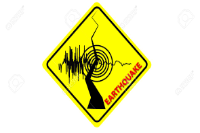

<Item title:"Earthquakes around the world from 1800s to early 1900s" type:Feature Layer Collection owner:renemorenow>
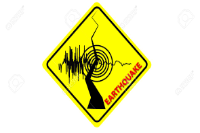

In [58]:
username = gis.users.me.username
for earthquakes_csv_item in gis.content.search(query="title:Earthquakes around the world from 1800s to early 1900s AND owner:"+username):
    display(earthquakes_csv_item)

In [ ]:
csv_path = os.path.join(data_path, "earthquakes.csv")
csv_properties={'title':'Earthquakes around the world from 1800s to early 1900s',
                'description':'Measurements from globally distributed seismometers',
                'tags':'arcgis, python, earthquake, natural disaster, emergency'}
thumbnail_path = os.path.join(data_path, "earthquake.png")

earthquake_csv_item = gis.content.add(item_properties=csv_properties, data=csv_path,
                                     thumbnail = thumbnail_path)

In [ ]:
earthquake_feature_layer_item = earthquake_csv_item.publish()
earthquake_feature_layer_item

In [ ]:
# check if service name is available
gis.content.is_service_name_available(service_name= "awesome_python", service_type = 'featureService')

In [ ]:
# let us publish an empty service
empty_service_item = gis.content.create_service(name='awesome_python', service_type='featureService')
empty_service_item

## https://support.esri.com/en/Technical-Article/000024383

# Display webmaps, Add content to webmaps and webscenes, Build webmaps

In [44]:
from IPython.display import display
from arcgis.mapping import WebMap, WebScene

In [45]:
webmap_search = gis.content.search("COVID 19", item_type="Web Map")
webmap_search

[<Item title:"Global COVID Country Confirmed Cases May 2020" type:Web Map owner:bdasc1>,
 <Item title:"Confirmed Covid19 cases in UK - last updated on 17.04.2020 (Please visit https://coronavstats.co.uk/)" type:Web Map owner:chonglappan>,
 <Item title:"COVID-19 Community Resource Map [Live]" type:Web Map owner:rarareines>,
 <Item title:"Spread of confirmed cases of COVID-19 in counties in TN, December 15-22, 2020 as reported by TN Department of Health at https://www.tn.gov/health/cedep/ncov.html" type:Web Map owner:antipovaangela1>,
 <Item title:"COVID-19 SPREAD AW" type:Web Map owner:amandawestman>,
 <Item title:"Peta Sebaran Risiko Covid-19 Kabupaten Kebumen" type:Web Map owner:FajarAniqSafira>,
 <Item title:"Spread of confirmed cases of COVID-19 in counties in TN, November 14-21, 2020 as reported by TN Department of Health at https://www.tn.gov/health/cedep/ncov.html" type:Web Map owner:antipovaangela1>,
 <Item title:"Bivariate Covid-19 Deaths and Poverty" type:Web Map owner:kibrown

In [47]:
ebola_map_item = webmap_search[0]
ebola_map_item

<Item title:"Global COVID Country Confirmed Cases May 2020" type:Web Map owner:bdasc1>

In [7]:
empty_webmap = WebMap()
empty_webmap.layers

[]

In [17]:
ebola_map = WebMap(ebola_map_item)
for layer in ebola_map.layers:
    print(layer.title)
print(dict(ebola_map.definition).keys())
print(ebola_map.basemap)
print(ebola_map.definition.spatialReference)

Ebola Treatment Centers Status
Country Boundaries
OSMAfrica
dict_keys(['operationalLayers', 'baseMap', 'spatialReference', 'version', 'applicationProperties'])
{
  "baseMapLayers": [
    {
      "id": "baseLayer_001",
      "layerType": "ArcGISTiledMapServiceLayer",
      "opacity": 1,
      "visibility": true,
      "url": "http://ebolamaps.who.int/arcgis/rest/services/BASEMAPS/WHO_West_Africa_background_7/MapServer"
    },
    {
      "id": "WHO_West_Africa_reference_7_3888",
      "layerType": "ArcGISTiledMapServiceLayer",
      "isReference": true,
      "opacity": 1,
      "visibility": true,
      "url": "http://ebolamaps.who.int/arcgis/rest/services/BASEMAPS/WHO_West_Africa_reference_7/MapServer"
    },
    {
      "id": "WHO_West_Africa_reference_7_4287",
      "layerType": "ArcGISTiledMapServiceLayer",
      "isReference": true,
      "opacity": 1,
      "visibility": true,
      "url": "http://ebolamaps.who.int/arcgis/rest/services/BASEMAPS/WHO_West_Africa_reference_7/MapServ

In [18]:
ebola_map

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [19]:
webmap_item_properties = {'title':'Ebola incidents and facilities',
                         'snippet':'Map created using Python API showing locations of Ebola treatment centers',
                         'tags':['automation', 'ebola', 'world health', 'python']}
webmap_item_properties

{'title': 'Ebola incidents and facilities',
 'snippet': 'Map created using Python API showing locations of Ebola treatment centers',
 'tags': ['automation', 'ebola', 'world health', 'python']}

In [20]:
webscene_search = gis.content.search("", item_type="Web Scene")
webscene_search

[<Item title:"Britten Wilder-Autobiography of Author Britten Wilder" type:Web Scene owner:brittenwilder>,
 <Item title:"Santa Maria Volcano Data" type:Web Scene owner:RossDonihue>,
 <Item title:"Interesting Places" type:Web Scene owner:dkensok>,
 <Item title:"BAG 3D - Nederland" type:Web Scene owner:Esri_NL_Content>,
 <Item title:"Visualize New Developments" type:Web Scene owner:esri_3d>,
 <Item title:"Berlin, Germany Scene" type:Web Scene owner:esri_3d>,
 <Item title:"Dorchester Avenue Plan Area Boundary" type:Web Scene owner:Learn_ArcGIS>,
 <Item title:"Linz, Austria Scene" type:Web Scene owner:esri_3d>,
 <Item title:"Airflow Globe" type:Web Scene owner:cartogeek>,
 <Item title:"Brest, France Scene" type:Web Scene owner:esri_3d>]

In [34]:
webscene_item = webscene_search[2]
webscene_item

<Item title:"Interesting Places" type:Web Scene owner:dkensok>

In [35]:
from arcgis.mapping import WebScene
webscene_obj = WebScene(webscene_item)
webscene_obj

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'), mode='3D')

In [36]:
webscene_obj.keys()

odict_keys(['operationalLayers', 'baseMap', 'ground', 'heightModelInfo', 'version', 'authoringApp', 'authoringAppVersion', 'presentation', 'initialState', 'spatialReference', 'viewingMode'])

In [37]:
webscene_obj["initialState"]

{'environment': {'lighting': {'datetime': 1426450124000,
   'displayUTCOffset': -8},
  'atmosphereEnabled': True,
  'starsEnabled': True},
 'viewpoint': {'camera': {'position': {'spatialReference': {'latestWkid': 3857,
     'wkid': 102100},
    'x': -13601480.90077368,
    'y': 5820719.675047723,
    'z': 2423.2742257490754},
   'heading': 182.49906564751697,
   'tilt': 83.73152384316909}}}

In [62]:
webscene_search = gis.content.search("", item_type="Web Scene", outside_org=True)
webscene_search

[<Item title:"Britten Wilder-Autobiography of Author Britten Wilder" type:Web Scene owner:brittenwilder>,
 <Item title:"Dorchester Avenue Plan Area Boundary" type:Web Scene owner:Learn_ArcGIS>,
 <Item title:"Interesting Places" type:Web Scene owner:dkensok>,
 <Item title:"BAG 3D - Nederland" type:Web Scene owner:Esri_NL_Content>,
 <Item title:"Visualize New Developments" type:Web Scene owner:esri_3d>,
 <Item title:"Berlin, Germany Scene" type:Web Scene owner:esri_3d>,
 <Item title:"Santa Maria Volcano " type:Web Scene owner:EsriTrainingSvc>,
 <Item title:"Santa Maria Volcano Data" type:Web Scene owner:RossDonihue>,
 <Item title:"Airflow Globe" type:Web Scene owner:cartogeek>,
 <Item title:"Linz, Austria Scene" type:Web Scene owner:esri_3d>]

<Item title:"Visualize New Developments" type:Web Scene owner:esri_3d>
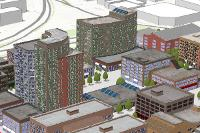

In [67]:
webscene_item = webscene_search[4]
webscene_item

In [69]:
from arcgis.mapping import WebScene
webscene_obj = WebScene(webscene_item)
webscene_obj['operationalLayers'][0]

{'id': '15f2fe08c8d-layer-0',
 'showLegend': True,
 'opacity': 1,
 'disablePopup': True,
 'title': 'Non-Project Buildings',
 'url': 'https://tiles.arcgis.com/tiles/P3ePLMYs2RVChkJx/arcgis/rest/services/BuildingShells_Existing/SceneServer/layers/0',
 'visibility': True,
 'itemId': '01f432dabdc845bb899cdd27143e1ea6',
 'layerType': 'ArcGISSceneServiceLayer',
 'layerDefinition': {'elevationInfo': {'mode': 'absoluteHeight'},
  'drawingInfo': {'renderer': {'authoringInfo': {},
    'type': 'simple',
    'symbol': {'type': 'MeshSymbol3D',
     'symbolLayers': [{'type': 'Fill',
       'material': {'color': [255, 255, 255], 'colorMixMode': 'replace'},
       'edges': {'type': 'solid',
        'color': [0, 0, 0],
        'transparency': 60,
        'size': 1}}]}}}},
 'showLabels': False,
 'screenSizePerspective': True}

In [70]:
webscene_obj

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'), mode='3D')

# Publish and overwrite

### Publishing packages as web layers
https://developers.arcgis.com/python/sample-notebooks/publishing-packages-as-web-layers/

In [ ]:
tpk_item = gis.content.add({}, data=r'D:\EsriTraining\APIforPython\api_lyr_sym.zip', folder='packages')
tpk_item

In [42]:
item_properties = {"snippet":"""This dataset was collected from Utah DOT open data portal.
                            Source URL: <a href="http://udot.uplan.opendata.arcgis.com/
                            datasets/a627bb128ac44767832402f7f9bde909_10">http://udot.uplan.opendata.arcgis.com/
                            datasets/a627bb128ac44767832402f7f9bde909_10</a>""",
                   "title":"Locations of power pedestals collected in 2012",
                   "tags":"opendata"}
item_properties

{'snippet': 'This dataset was collected from Utah DOT open data portal.\n                            Source URL: <a href="http://udot.uplan.opendata.arcgis.com/\n                            datasets/a627bb128ac44767832402f7f9bde909_10">http://udot.uplan.opendata.arcgis.com/\n                            datasets/a627bb128ac44767832402f7f9bde909_10</a>',
 'title': 'Locations of power pedestals collected in 2012',
 'tags': 'opendata'}

In [72]:
search_result = gis.content.search("title:Montreal, Canada Buildings AND owner:esri_3d", 
                                   item_type="scene service", outside_org = True)
display(search_result)

[<Item title:"Buildings_Montreal_2016" type:Scene Layer owner:esri_3d>,
 <Item title:"Buildings_Montreal" type:Scene Layer owner:esri_3d>,
 <Item title:"Montreal, Canada Buildings" type:Scene Layer owner:esri_3d>]

<Item title:"Buildings_Montreal_2016" type:Scene Layer owner:esri_3d>
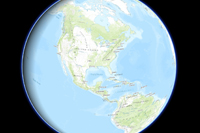

In [73]:
buildings_layer = search_result[0]
display(buildings_layer)

In [75]:
# Read sample web scene json from text file. We use built-in json module to parse it into a Python dictionary
web_scene_dict = dict()
with open(r"D:\EsriTraining\APIforPython\arcgis-python-api\samples\05_content_publishers\data\web_scene_simple.json","r") as file_handle:
    web_scene_dict = json.load(file_handle)

display(web_scene_dict)

{'operationalLayers': [{'itemId': '',
   'title': '',
   'visibility': True,
   'opacity': 1,
   'url': '',
   'layerType': ''}],
 'baseMap': {'baseMapLayers': [{'id': '933075fa973f49948a88b84dae743704',
    'visibility': True,
    'opacity': 1,
    'layerDefinition': {},
    'url': 'http://services.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer',
    'layerType': 'ArcGISTiledMapServiceLayer'}],
  'title': 'World Street Map',
  'elevationLayers': [{'url': 'https://elevation3d.arcgis.com/arcgis/rest/services/WorldElevation3D/Terrain3D/ImageServer',
    'id': 'globalElevation_0',
    'layerType': 'ArcGISTiledElevationServiceLayer'}]},
 'spatialReference': {'wkid': 102100, 'latestWkid': 3857},
 'version': '1.4',
 'viewingMode': 'global',
 'tables': []}

In [76]:
# Update web scene's opertaional layer with properties of buildings_layer
web_scene_dict['operationalLayers'][0]['itemId'] = buildings_layer.itemid
web_scene_dict['operationalLayers'][0]['layerType'] = "ArcGISSceneServiceLayer"
web_scene_dict['operationalLayers'][0]['title'] = buildings_layer.title
web_scene_dict['operationalLayers'][0]['url'] = buildings_layer.url

In [77]:
web_scene_item_properties = {'title':'Web scene with photo realistic buildings',
                            'type':'Web Scene',
                            'snippet':'This scene highlights buildings of Montreal, Canada',
                            'tags':'ArcGIS Python API',
                            'text': json.dumps(web_scene_dict)}

# Use the add() method to publish a new web scenej
web_scene_item = gis.content.add(web_scene_item_properties)
web_scene_item.share(True)
display(web_scene_item)

<Item title:"Web scene with photo realistic buildings" type:Web Scene owner:renemorenow>

In [79]:
web_scene_obj = WebScene(web_scene_item)

# display the interactive web scene in the notebook
web_scene_obj

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'), mode='3D')

In [4]:
gis.content.create_folder('packages')

{'username': 'renemorenow',
 'id': '2838122b9bf14e8f91ff033b88a807c6',
 'title': 'packages'}

<Item title:"USA_counties_divorce_rate" type:Tile Package owner:renemorenow>
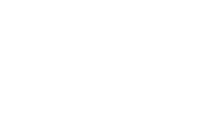

In [5]:
tpk_item = gis.content.add({}, data=r"D:\EsriTraining\APIforPython\arcgis-python-api\samples\05_content_publishers\data\USA_counties_divorce_rate.tpk", folder='packages')
tpk_item

In [7]:
try:
    tile_layer = tpk_item.publish()
    tile_layer
except Exception as ex:
    print(str(ex))

{'message': "Service name 'USA_counties_divorce_rate' already exists for 'Bd3GqULNdzgCeQfi'"}


In [9]:
slpk_item = gis.content.add({}, data=r"D:\EsriTraining\APIforPython\arcgis-python-api\samples\05_content_publishers\data\World_earthquakes_2000_2010.slpk", folder='packages')
slpk_item

<Item title:"World_earthquakes_2000_2010" type:Scene Package owner:renemorenow>

In [10]:
try:
    slpk_layer = slpk_item.publish()
except Exception as ex:
    print(str(ex))
slpk_layer

<Item title:"World_earthquakes_2000_2010" type:Scene Layer owner:renemorenow>

### Publishing SDs, Shapefiles and CSVs
https://developers.arcgis.com/python/samples/publishing-sd-shapefiles-and-csv/

In [15]:
# path relative to this notebook
data_dir = r"D:\EsriTraining\APIforPython\arcgis-python-api\samples\05_content_publishers\data"

#Get list of all files
file_list = os.listdir(data_dir)

#Filter and get only .sd files
sd_file_list = [x for x in file_list if x.endswith(".sd")]
print("Number of .sd files found: " + str(len(sd_file_list)))
for x in file_list:
    if x.endswith(".sd"):
        print(x)

Number of .sd files found: 3
NewPy_WTL_test_SingleLayerBuildCache.sd
Nursing_home_locations.sd
WA_DSHS_admin_boundaries.sd


<Item title:"NewPy_WTL_test_SingleLayerBuildCache" type:Map Image Layer owner:renemorenow>

<Item title:"Nursing_home_locations" type:Feature Layer Collection owner:renemorenow>
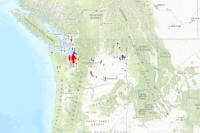

Exception: No job id

In [18]:
# Loop through each file and publish it as a service
for current_sd_file in sd_file_list:
    item = gis.content.add({}, data_dir +"\\"+ current_sd_file)   # .sd file is uploaded and a .sd file item is created
    if "BuildCache" not in current_sd_file:
        published_item = item.publish()                      # .sd file item is published and a web layer item is created
    else:
        published_item = item.publish(build_initial_cache=True)  # publish as hosted tile layer with "build cache" enabled
    display(published_item)

In [5]:
sd_file = r"D:\EsriTraining\APIforPython\arcgis-python-api\samples\05_content_publishers\data\Nursing_home_locations.sd"

item_properties = {
    "title": "Nursing Home Locations from SD file",
    "tags" : "test 1st, test 2nd, test 2023",
    "snippet": "test snippet 123456",
    "description": "test description",
    "type": "Feature Collection",
    "typeKeywords": "Data, Feature Collection, Singlelayer", 
    'access': 'org'
}

In [6]:
uploaded_file = gis.content.add({}, sd_file)
uploaded_file.tags

['opendata', 'health', 'automation', 'ArcGIS', 'Service Definition', '.sd']

<Item title:"Nursing_home_locations" type:Service Definition owner:renemorenow>
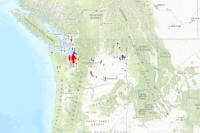

In [7]:
uploaded_file

In [8]:
uploaded_file.update(item_properties) # this procedure overwrites the properties you set in sd file
uploaded_file.tags

['test 1st', 'test 2nd', 'test 2023']

In [12]:
dict(uploaded_file)

{'id': '40428574422d4c0c80c01e36bdf763c9',
 'owner': 'renemorenow',
 'created': 1701356070000,
 'isOrgItem': True,
 'modified': 1701356110000,
 'guid': '51973352-4591-4802-93BB-59360535AE0C',
 'name': 'Nursing_home_locations.sd',
 'title': 'Nursing Home Locations from SD file',
 'type': 'Service Definition',
 'typeKeywords': ['ArcGIS',
  'Data',
  'Feature Collection',
  'Service Definition',
  'Singlelayer'],
 'description': 'test description',
 'tags': ['test 1st', 'test 2nd', 'test 2023'],
 'snippet': 'test snippet 123456',
 'thumbnail': 'thumbnail/thumbnail.png',
 'documentation': None,
 'extent': [[-124.393179116453, 45.5883017877787],
  [-117.048569159349, 48.9991852646813]],
 'categories': [],
 'spatialReference': 'WGS_1984_Web_Mercator_Auxiliary_Sphere',
 'accessInformation': '',
 'classification': None,
 'licenseInfo': '',
 'culture': 'en-us',
 'properties': None,
 'advancedSettings': None,
 'url': '',
 'proxyFilter': None,
 'access': 'private',
 'size': 68403,
 'subInfo': 0,


In [13]:
item = uploaded_file.publish()
item.tags

['test 1st', 'test 2nd', 'test 2023']

In [14]:
item.update(item_properties) # this procedure overwrites the properties you set in service
item.tags

['test 1st', 'test 2nd', 'test 2023']

In [15]:
uploaded_file.delete()

True

In [16]:
data = r"D:\EsriTraining\APIforPython\arcgis-python-api\samples\05_content_publishers\data\power_pedestals_2012.zip"
shpfile = gis.content.add({}, data)

In [17]:
published_service = shpfile.publish()

In [18]:
display(published_service)

<Item title:"power_pedestals_2012" type:Feature Layer Collection owner:renemorenow>

In [21]:
thumbnail_path = r"D:\EsriTraining\APIforPython\arcgis-python-api\samples\05_content_publishers\data\power_pedestals_thumbnail.PNG"
item_properties = {"snippet":"""This dataset was collected from Utah DOT open data portal.
                            Source URL: <a href="http://udot.uplan.opendata.arcgis.com/
                            datasets/a627bb128ac44767832402f7f9bde909_10">http://udot.uplan.opendata.arcgis.com/
                            datasets/a627bb128ac44767832402f7f9bde909_10</a>""",
                   "title":"Locations of power pedestals collected in 2012",
                   "tags":"opendata"}

<Item title:"Locations of power pedestals collected in 2012" type:Feature Layer Collection owner:renemorenow>
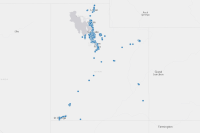

In [22]:
published_service.update(item_properties, thumbnail=thumbnail_path)
display(published_service)

In [23]:
csv_file = r"D:\EsriTraining\APIforPython\arcgis-python-api\samples\05_content_publishers\data\Chennai_precipitation.csv"
csv_item = gis.content.add({}, csv_file)
csv_file

'D:\\EsriTraining\\APIforPython\\arcgis-python-api\\samples\\05_content_publishers\\data\\Chennai_precipitation.csv'

In [24]:
csv_lyr = csv_item.publish(None, {"Address":"LOCATION"})
csv_lyr

<Item title:"Chennai_precipitation" type:Table Layer owner:renemorenow>

In [25]:
# create a new folder called 'Rainfall Data'
new_folder_details = gis.content.create_folder("Topic_Publish_and_overwrite")
print(new_folder_details)

{'username': 'renemorenow', 'id': '572e6d8c2f924293a5dd63c2de64f9b9', 'title': 'Topic_Publish_and_overwrite'}


In [26]:
# move both the csv_item and csv_lyr items into this new folder
csv_item.move(new_folder_details)  # Here you could either pass name of the folder or the dictionary
                                   # returned from create_folder() or folders property on a User object

csv_lyr.move(new_folder_details)

{'success': True,
 'itemId': '3b1f59c6cd3b455ab202133146a2e199',
 'owner': 'renemorenow',
 'folder': '572e6d8c2f924293a5dd63c2de64f9b9'}

# Ejercicios SGC

In [1]:
from sgc import sgccat20lib
sgccat20lib.profile_storaged = "sgc20_sabanalarga"
gis = sgccat20lib.gisLogin()
print(gis.url)

https://arcgis.catasig.com.co/portal/


In [2]:
dictParams = sgccat20lib.ObtenerParametros()
parcel_service = dictParams["PARCEL_SERVICE_NAME"]
gis = sgccat20lib.gisLogin("profile")
ParcelService = gis.content.get(parcel_service)
urlParcelService = ParcelService.url
urlParcelService

'https://arcgis.catasig.com.co/server/rest/services/SERVICIOS/FS_Conservacion_edicion/FeatureServer'

In [3]:
from arcgis.features import FeatureLayer
url_layer_table = "{0}/{1}".format(urlParcelService, sgccat20lib.getLayers()["PREDIO"]["ID"])
table = FeatureLayer(url_layer_table, gis=gis)
#print(table.properties)
feature_set = table.query(
    where="estado_predio='Activo'", out_fields="condicion_predio"
    ,group_by_fields_for_statistics="condicion_predio"
    ,out_statistics=[{"statisticType":"count", "onStatisticField":"condicion_predio", "outStatisticFieldName":"Cantidad"}]
    )
feature_set.sdf

,condicion_predio,cantidad,OBJECTID
0,Informal,4378,1
1,NPH,18540,2
2,PH_Matriz,23,3
3,PH_Unidad_Predial,81,4


In [11]:
import pandas as pd

In [30]:
sdf = pd.DataFrame.spatial.from_layer(table)
predios_Activos = sdf[sdf["estado_predio"] == "Activo"]
predios_Activos.groupby(sdf['condicion_predio']).size()

condicion_predio
Informal              4378
NPH                  18540
PH_Matriz               23
PH_Unidad_Predial       81
dtype: int64

In [16]:
predios_Activos['condicion_predio'].unique()

array(['NPH', 'Informal', 'PH_Matriz', 'PH_Unidad_Predial'], dtype=object)

In [50]:
permits_by_status = predios_Activos.groupby(predios_Activos['condicion_predio']).size()
permits_by_status.sort_values(ascending=False, inplace=True)
permits_by_status

condicion_predio
NPH                  18540
Informal              4378
PH_Unidad_Predial       81
PH_Matriz               23
dtype: int64

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

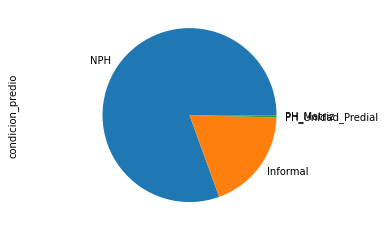

In [29]:
plt.axis('equal') 
permits_by_status.plot(kind='pie', legend=False, label='condicion_predio');

In [48]:
url_layer_table = "{0}/{1}".format(urlParcelService, sgccat20lib.getLayers()["REGISTRO_MUTACIONES"]["ID"])
tableTramites = FeatureLayer(url_layer_table, gis=gis)
sdf = pd.DataFrame.spatial.from_layer(tableTramites)
#filtroTramites = sdf[sdf["estado_predio"] == "Activo"]
sdf.groupby(sdf['tipo_tramite']).size()

tipo_tramite
1    14
3     3
dtype: int64

In [45]:
sdf.groupby(['tipo_tramite', 'tipo_mutacion', 'subtipo_mutacion']).size()

tipo_tramite  tipo_mutacion  subtipo_mutacion
1             2              21                  2
                             22                  2
              3              31                  2
                             32                  2
              5                                  2
dtype: int64

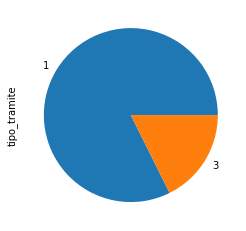

In [53]:
tipoTramite = sdf.groupby(sdf['tipo_tramite']).size()
tipoTramite.sort_values(ascending=False, inplace=True)
tipoTramite
tipoTramite.plot(kind='pie', legend=False, label='tipo_tramite');

# Analyze patterns

## Analyzing patterns in feature data
https://developers.arcgis.com/python/guide/analyzing-patterns-in-feature-data/

<Item title:"chennai_rain" type:Feature Layer Collection owner:api_data_owner>
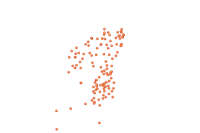

In [30]:
chennai_rainfall = gis.content.search("title:chennai_rain type:Feature Service", outside_org=True)[0]
chennai_rainfall

In [31]:
map1 = gis.map("Tamil Nadu", zoomlevel=7)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [40]:
map1.add_layer(chennai_rainfall, { "renderer":"ClassedSizeRenderer", "field_name":"RAINFALL" })
map1.zoom_to_layer(chennai_rainfall)

In [41]:
map1.layers

[<FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/chennai_rain/FeatureServer/0">]

In [51]:
from arcgis.features.analyze_patterns import interpolate_points

#run the interpolation tool and specify the field containing rainfall data
interpolated_rf = interpolate_points(chennai_rainfall, field='RAINFALL')

In [52]:
interpolated_rf

{'result_layer': <FeatureCollection>,
 'prediction_error': '',
 'predicted_point_layer': ''}

In [53]:
interpolated_map = gis.map("Tamil Nadu", zoomlevel = 7)
interpolated_map

MapView(layout=Layout(height='400px', width='100%'))

In [56]:
interpolated_map.add_layer(interpolated_rf['result_layer'])

# Manage content

### https://developers.arcgis.com/python/guide/accessing-and-creating-content/

### https://developers.arcgis.com/python/guide/managing-your-content/

# Clone content

### Clonar Dashboard:
https://youtu.be/PhEM-k34bbY?t=689

# Create views

<Item title:"World Earthquakes" type:Feature Layer Collection owner:EsriTrainingSvc>
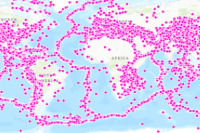

<FeatureLayerCollection url:"https://services.arcgis.com/ue9rwulIoeLEI9bj/arcgis/rest/services/World_Earthquakes/FeatureServer">

In [20]:
from arcgis.features import FeatureLayerCollection
#source_search = gis.content.search("World Earthquakes", item_type="Feature Layer", outside_org=True)[0]
source_search = gis.content.get("1efd0f15c3a14a3bbbb5b5b76ba0e255")
display(source_search)

In [24]:
source_flc_cloned = gis.content.clone_items([source_search], folder="views")
source_flc_cloned

[<Item title:"World Earthquakes" type:Feature Layer Collection owner:renemorenow>]

In [88]:
source_search_csv = gis.content.get("a103e700deec4359a85255a501859c64")
itempub = source_search_csv.publish()

<Item title:"Earthquakes around the world from 1800s to early 1900s" type:Feature Layer Collection owner:renemorenow>
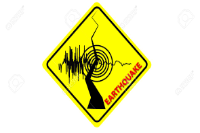

In [47]:
source_search_2view = itempub
display(source_search_2view)

In [89]:
source_flc = FeatureLayerCollection.fromitem(source_search_2view)
source_flc

<FeatureLayerCollection url:"https://services3.arcgis.com/Bd3GqULNdzgCeQfi/arcgis/rest/services/World_Earthquakes_shape/FeatureServer">

In [90]:
new_view = source_flc.manager.create_view(name="view_World_Earthquakes_mag5min", description="preparacion examen certificacion python api")
display(new_view)
view_search = gis.content.search("view_World_Earthquakes_mag5min", "feature service")[0]
view_flc = FeatureLayerCollection.fromitem(view_search)
service_layer = view_flc.layers[0]
print(service_layer.url)
update_dict = {"viewDefinitionQuery" : "mag >= 5"}
service_layer.manager.update_definition(update_dict)
view_search

<Item title:"view_World_Earthquakes_mag5min" type:Feature Layer Collection owner:renemorenow>

https://services3.arcgis.com/Bd3GqULNdzgCeQfi/arcgis/rest/services/view_World_Earthquakes_mag5min/FeatureServer/0


<Item title:"view_World_Earthquakes_mag5min" type:Feature Layer Collection owner:renemorenow>

In [22]:
view_search = gis.content.search("view_Cucuta_campo", "feature service")[0]
view_flc = FeatureLayerCollection.fromitem(view_search)
display(view_flc)
lyr_predio = next(iter(filter(lambda x: x.properties.name.upper()=="Predio".upper(), view_flc.tables)), None)
display(lyr_predio)
service_layer = lyr_predio

update_dict = {"viewDefinitionQuery" : "condicion_predio = 'Informal'"}

service_layer.manager.update_definition(update_dict)
service_layer

<FeatureLayerCollection url:"https://instalacionsgcladm.esri.co/server/rest/services/Hosted/view_Cucuta_campo/FeatureServer">

<Table url:"https://instalacionsgcladm.esri.co/server/rest/services/Hosted/view_Cucuta_campo/FeatureServer/62">

<Table url:"https://instalacionsgcladm.esri.co/server/rest/services/Hosted/view_Cucuta_campo/FeatureServer/62">

# Perform spatial analysis

In [58]:
import datetime
import pandas as pd

<Group title:"LA County Emergency Management" owner:api_data_owner>
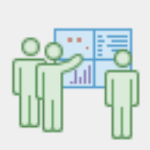

In [63]:
# get our group
#group = gis.groups.search('LA County Emergency Management')[0]
group = gis.groups.get('8fecfa8a4c994f46a1fb2fe9d5909bbd')
group

<Item title:"Active California Fires" type:Feature Layer Collection owner:api_data_owner>
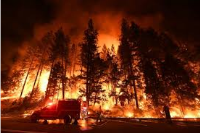

<Item title:"Critical Infrastructure in Southern California" type:Feature Layer Collection owner:api_data_owner>
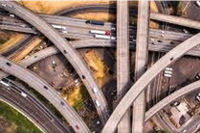

<Item title:"LA County Infrastructure At Risk" type:Web Map owner:arcgis_python>
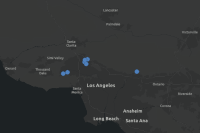

In [64]:
items = group.content()
for item in items:
    display(item)

In [67]:
m = gis.map('Los Angeles', 9)
m

MapView(layout=Layout(height='400px', width='100%'))

In [68]:
fires = items[0]
print(fires.url)
m.add_layer(fires)

https://pythonapi.playground.esri.com/server/rest/services/Hosted/Active_California_Fires/FeatureServer


In [69]:
infra = items[1]
print(infra.url)
m.add_layer(infra)

https://pythonapi.playground.esri.com/server/rest/services/Hosted/Critical_Infrastructure_in_Southern_California/FeatureServer


In [74]:
webmapitem = items[2]
print(webmapitem.url)

None


In [75]:
# create a map of our area of interest
m1 = gis.map('Los Angeles', 9)
m1

MapView(layout=Layout(height='400px', width='100%'))

In [76]:
#add the active fires layer to the map
m1.add_layer(fires)

In [79]:
#add the critical infrastructure layer to the map
m1.add_layer(infra)
m1.zoom_to_layer(infra)

In [80]:
infra.url

'https://pythonapi.playground.esri.com/server/rest/services/Hosted/Critical_Infrastructure_in_Southern_California/FeatureServer'

In [92]:
from arcgis.features.use_proximity import create_buffers

# buffer the active fire boundaries and add as new content
timestamp = '{:%Y_%m_%d_%H_%M_%S}'.format(datetime.datetime.now())
firebuffers = create_buffers(input_layer=fires, distances=[4], field=None, field='Miles', output_name="Fire_Buffers_" + timestamp)
firebuffers

In [104]:
# buffer the active fire boundaries and add as new content
firebuffers_rings2 = create_buffers(input_layer=fires, distances=[9], field=None, units='Miles', ring_type="Disks")
firebuffers_rings2

<FeatureCollection>

In [94]:
# add risk areas to map
m1.add_layer(firebuffers)

In [105]:
m1.add_layer(firebuffers_rings2)

In [106]:
from arcgis.features.manage_data import overlay_layers

# run analysis to determine critical infrastructure within the risk boundaries
riskinfra = overlay_layers(firebuffers, infra, 
                        overlay_type="Intersect",
                        output_name="At_Risk_Infrastructure_" + timestamp)

In [134]:
riskinfra.layers

[<FeatureLayer url:"https://pythonapi.playground.esri.com/server/rest/services/Hosted/At_Risk_Infrastructure_2023_12_01_22_50_18/FeatureServer/0">]

In [137]:
map_overlaps = gis.map("Los Angeles, CA", 10)
map_overlaps

MapView(layout=Layout(height='400px', width='100%'))

In [140]:
map_overlaps.add_layer(infra)
map_overlaps.add_layer(riskinfra)

<Item title:"LA County Infrastructure At Risk" type:Web Map owner:arcgis_python>
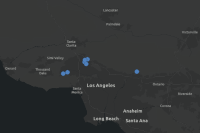

In [142]:
ebmapitem = items[2]
ebmapitem

In [143]:
# create a webmap from the item
webmap = arcgis.mapping.WebMap(webmapitem)

In [144]:
# read the operational layers in our webmap
for lyr in webmap.layers:
    if lyr['id'].startswith('At_Risk_Infrastructure'):
        print(lyr['url'])

https://pythonapi.playground.esri.com/server/rest/services/Hosted/At_Risk_Infrastructure_2023_11_30_14_22_22/FeatureServer/0


In [145]:
new_url = at_risk_facilities.url
new_url

'https://pythonapi.playground.esri.com/server/rest/services/Hosted/At_Risk_Infrastructure_2023_12_01_22_50_18/FeatureServer/0'

In [146]:
# update the url of the 'At Risk Infrastructure' layer in the web map

for lyr in webmap.layers:
    if lyr['id'].startswith('At_Risk_Infrastructure'):
        lyr['url'] = new_url

In [147]:
webmap.update()

True

In [148]:
#zoom in to the extents of Los Angeles in the map below, to view the webmapitem 
m3 = gis.map(webmapitem)
m3

MapView(layout=Layout(height='400px', width='100%'))

In [118]:
at_risk_facilities  = riskinfra.layers[0]
df = at_risk_facilities.query(as_df=True) # read the returned features as a Pandas dataframe
df.head(3)

,name_1,city,latitude,addrln2,link,addrln1,phones,source,shape_leng,use_type,...,date_updat,name,info1,analysisarea,perimeter_,acres,objectid,info2,status,SHAPE
0,Fish Fire,,34.176673,,http://egis3.lacounty.gov/lms/?p=24626,,,HSIP Freedom Gnis_cultural_fe,24948.867757,publish,...,2010-11-01,Azusa Powerplant Conduit,,112.45471,2016-06-26,10850,40242905,,Active,"{""x"": -117.87199392276113, ""y"": 34.17666797642..."
1,Pony Fire,,34.157505,,http://egis3.lacounty.gov/lms/?p=26620,,,HSIP Freedom Gnis_structures,3787.741971,publish,...,2010-11-01,Motion Picture And Television Fund Hospital,,57.4282,2016-06-26,1080,40244777,,Active,"{""x"": -118.63618579426031, ""y"": 34.15750062135..."
2,Wheaton Fire,,34.280934,,http://egis3.lacounty.gov/lms/?p=27055,,,HSIP Freedom Gnis_structures,6262.26394,publish,...,2011-05-03,Pacoima Memorial Hospital,,60.130013,2016-06-26,8940,40280838,,Active,"{""x"": -118.38329528379319, ""y"": 34.28092898174..."


In [120]:
# view simplified risk facilities table
if len(df) > 0:
    df1_simplified = df[['name', 'cat1', 'post_id']]
    df1_simplified

In [121]:
# Export this to a csv file. This CSV can then be shared with fire fighters.
csv_file = r'at_risk_facilities.csv'
df1_simplified.to_csv(csv_file)

In [129]:
# add at risk facilities layer to fresh map
m2.add_layer(riskinfra)

In [122]:
df = pd.read_html("https://en.wikipedia.org/wiki/Number_of_guns_per_capita_by_country")[0]
df.head()

,Unnamed: 0,Country or subnational area,Estimate of civilian firearms per 100 persons,Region[3],Subregion[3],Population 2017,Estimate of firearms in civilian possession,Computation method,Registered firearms,Unregistered firearms,Notes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,United States,120.5,Americas,North America,326474000.0,393347000,1.0,1073743.0,"392,273,257 Est.",[note 2]
2,2.0,Falkland Islands,62.1,Americas,South America,3000.0,2000,2.0,1705.0,295,NaN
3,3.0,Yemen,52.8,Asia,Western Asia,28120000.0,14859000,2.0,NaN,NaN,NaN
4,4.0,New Caledonia,42.5,Oceania,Melanesia,270000.0,115000,2.0,55000.0,60000,NaN


In [37]:
df.dropna(thresh=4, inplace=True)

In [38]:
del df['Unnamed: 0']
del df['Notes']

In [39]:
df.head()

,Country or subnational area,Estimate of civilian firearms per 100 persons,Region[3],Subregion[3],Population 2017,Estimate of firearms in civilian possession,Computation method,Registered firearms,Unregistered firearms
1,United States,120.5,Americas,North America,326474000.0,393347000,1.0,1073743.0,"392,273,257 Est."
2,Falkland Islands,62.1,Americas,South America,3000.0,2000,2.0,1705.0,295
3,Yemen,52.8,Asia,Western Asia,28120000.0,14859000,2.0,NaN,NaN
4,New Caledonia,42.5,Oceania,Melanesia,270000.0,115000,2.0,55000.0,60000
5,Serbia,39.1,Europe,Southern Europe,6946000.0,2719000,2.0,1186086.0,1532914


In [123]:
df.iloc[0,1] = 120.5
df.dtypes

Unnamed: 0                                       float64
Country or subnational area                       object
Estimate of civilian firearms per 100 persons    float64
Region[3]                                         object
Subregion[3]                                      object
Population 2017                                  float64
Estimate of firearms in civilian possession       object
Computation method                               float64
Registered firearms                              float64
Unregistered firearms                             object
Notes                                             object
dtype: object

In [41]:
converted_column = pd.to_numeric(df["Estimate of civilian firearms per 100 persons"], errors = 'coerce')
df['Estimate of civilian firearms per 100 persons'] = converted_column
df.head()

,Country or subnational area,Estimate of civilian firearms per 100 persons,Region[3],Subregion[3],Population 2017,Estimate of firearms in civilian possession,Computation method,Registered firearms,Unregistered firearms
1,United States,120.5,Americas,North America,326474000.0,393347000,1.0,1073743.0,"392,273,257 Est."
2,Falkland Islands,62.1,Americas,South America,3000.0,2000,2.0,1705.0,295
3,Yemen,52.8,Asia,Western Asia,28120000.0,14859000,2.0,NaN,NaN
4,New Caledonia,42.5,Oceania,Melanesia,270000.0,115000,2.0,55000.0,60000
5,Serbia,39.1,Europe,Southern Europe,6946000.0,2719000,2.0,1186086.0,1532914


In [43]:
from arcgis.gis import GIS
import json

gis = GIS()

In [44]:
fc = gis.content.import_data(df, {"CountryCode":"Country__or_dependent_territory__subnational_area__etc__"})

In [49]:
map1 = gis.map('UK')
map1

MapView(layout=Layout(height='400px', width='100%'))

In [50]:
map1.add_layer(fc, {"renderer":"ClassedSizeRenderer",
                    "field_name": "Estimate_of_civilian_firearms_per_100_persons"})
